# TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-07-24 18:07:23.994064: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate dataset
X = np.array([2 * np.random.random() for _ in range(100)])
y = 4 + 3 * X + np.random.normal(0, 1, size=X.shape)


# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Add bias term to X_train and X_test
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train].astype(np.float32)
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test].astype(np.float32)

# Manually Initialize weights
theta = tf.Variable(tf.random.normal([2], mean=0.0, stddev=0.1), dtype=tf.float32)

# Learning rate and other parameters
learning_rate = 0.01
n_iterations = 1000
m = X_train_b.shape[0]

# Gradient Descent
for iteration in range(n_iterations):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X_train_b, tf.reshape(theta, (-1, 1)))
        errors = y_train - tf.squeeze(y_pred)
        
        # Compute loss
        loss = tf.reduce_mean(tf.square(errors))
    
    # Compute gradients
    gradients = tape.gradient(loss, [theta])
    
    if gradients[0] is None:
        print("Gradient is None, skipping update.")
        continue

    # Debug: Print gradients and loss
    if iteration % 500 == 0:
        print(f"Iteration {iteration}: Loss = {loss.numpy()}, Theta = {theta.numpy()}")

    # Apply gradients
    theta.assign_sub(learning_rate * gradients[0])

# Make predictions on the test set
y_train_pred = tf.matmul(X_train_b, tf.reshape(theta, (-1, 1)))
y_test_pred = tf.matmul(X_test_b, tf.reshape(theta, (-1, 1)))

# Calculate Mean Squared Error (MSE)
mse = tf.reduce_mean(tf.square(y_test - tf.squeeze(y_test_pred)))

print(f"Theta: {theta.numpy()}")
print(f"Mean Squared Error (MSE): {mse.numpy()}")


Iteration 0: Loss = 49.58088302612305, Theta = [ 0.03274685 -0.08426258]
Iteration 500: Loss = 0.7810163497924805, Theta = [4.069471 2.829061]
Theta: [4.2068315 2.7080855]
Mean Squared Error (MSE): 0.9713665843009949


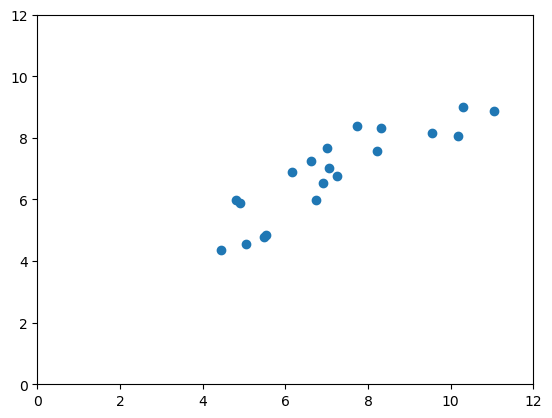

In [5]:
plt.scatter(y_test, y_test_pred.numpy().reshape(-1))
plt.xlim(0,12)
plt.ylim(0,12)
plt.show()